In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk import stem
import string
from wordcloud import WordCloud
import re

# Data Exploration

In [2]:
# load dataset
df = pd.read_csv("dataset/spam.csv", encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# drop non important column
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# null check
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
print("% of ham message is {}".format(df[df["v1"]=="ham"]["v1"].value_counts() / df.shape[0]))
print("% of spam message is {}".format(df[df["v1"]=="spam"]["v1"].value_counts() / df.shape[0]))

% of ham message is ham    0.865937
Name: v1, dtype: float64
% of spam message is spam    0.134063
Name: v1, dtype: float64


# Data Visualization

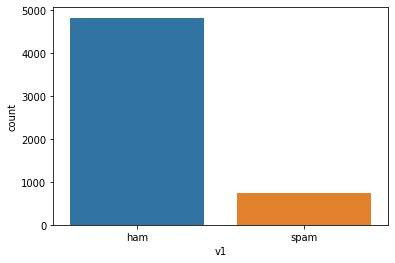

In [8]:
# plot how many spam mail is in dataset
sns.countplot("v1", data=df)

As you see percentage of each type of SMS. 86% is ham, 13% is spam 

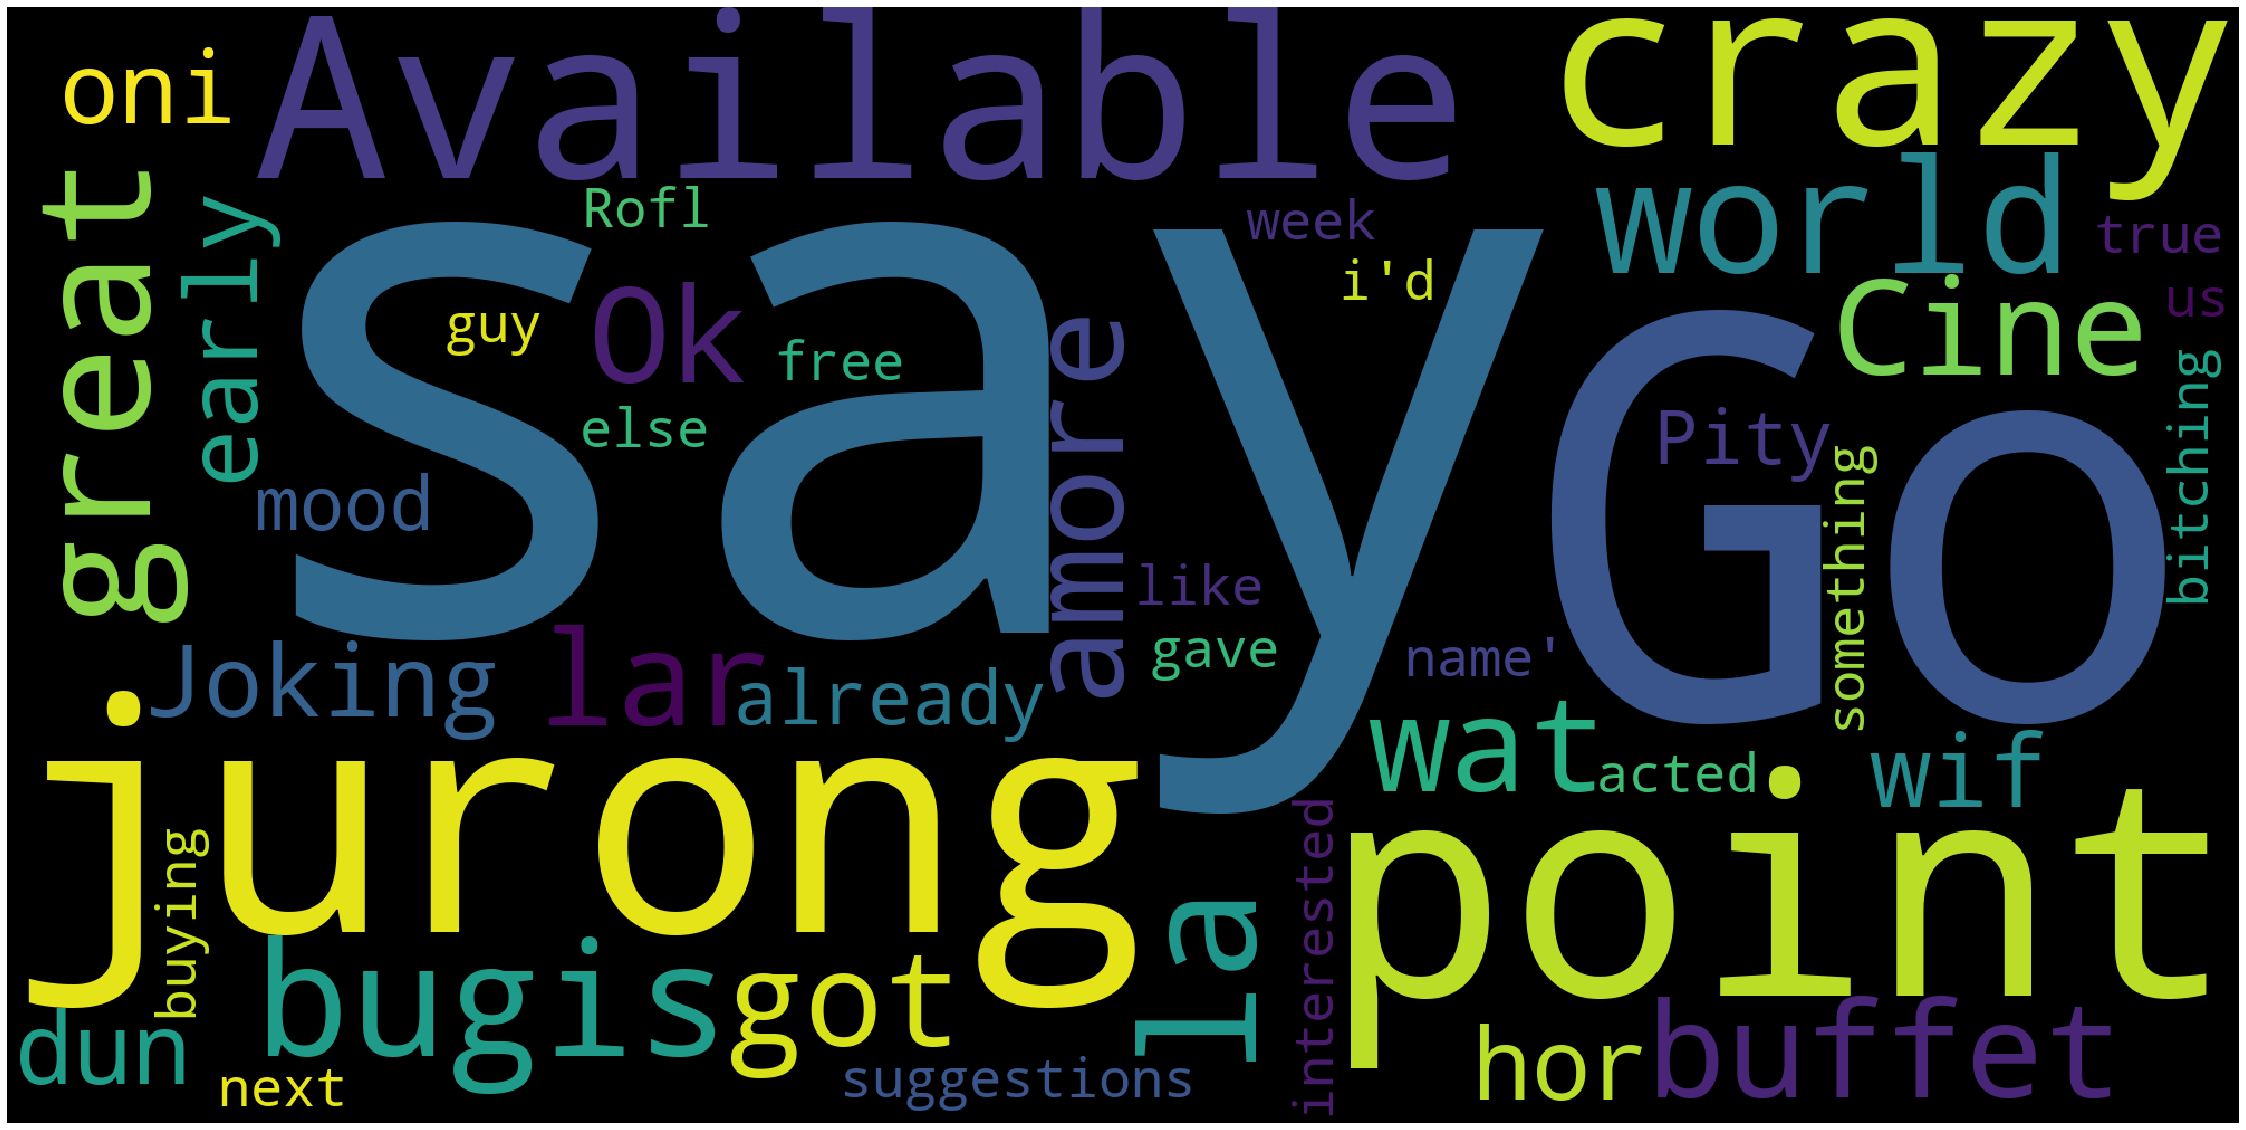

In [9]:
# plot ham
stop_words = set(stopwords.words('english'))

word_cloud = WordCloud(width=2000, 
                                            height=1000,
                                            background_color="black",
                                            stopwords=stop_words).generate(str(df[df["v1"]=="ham"]["v2"].values))

fig = plt.figure(figsize = (40, 30))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

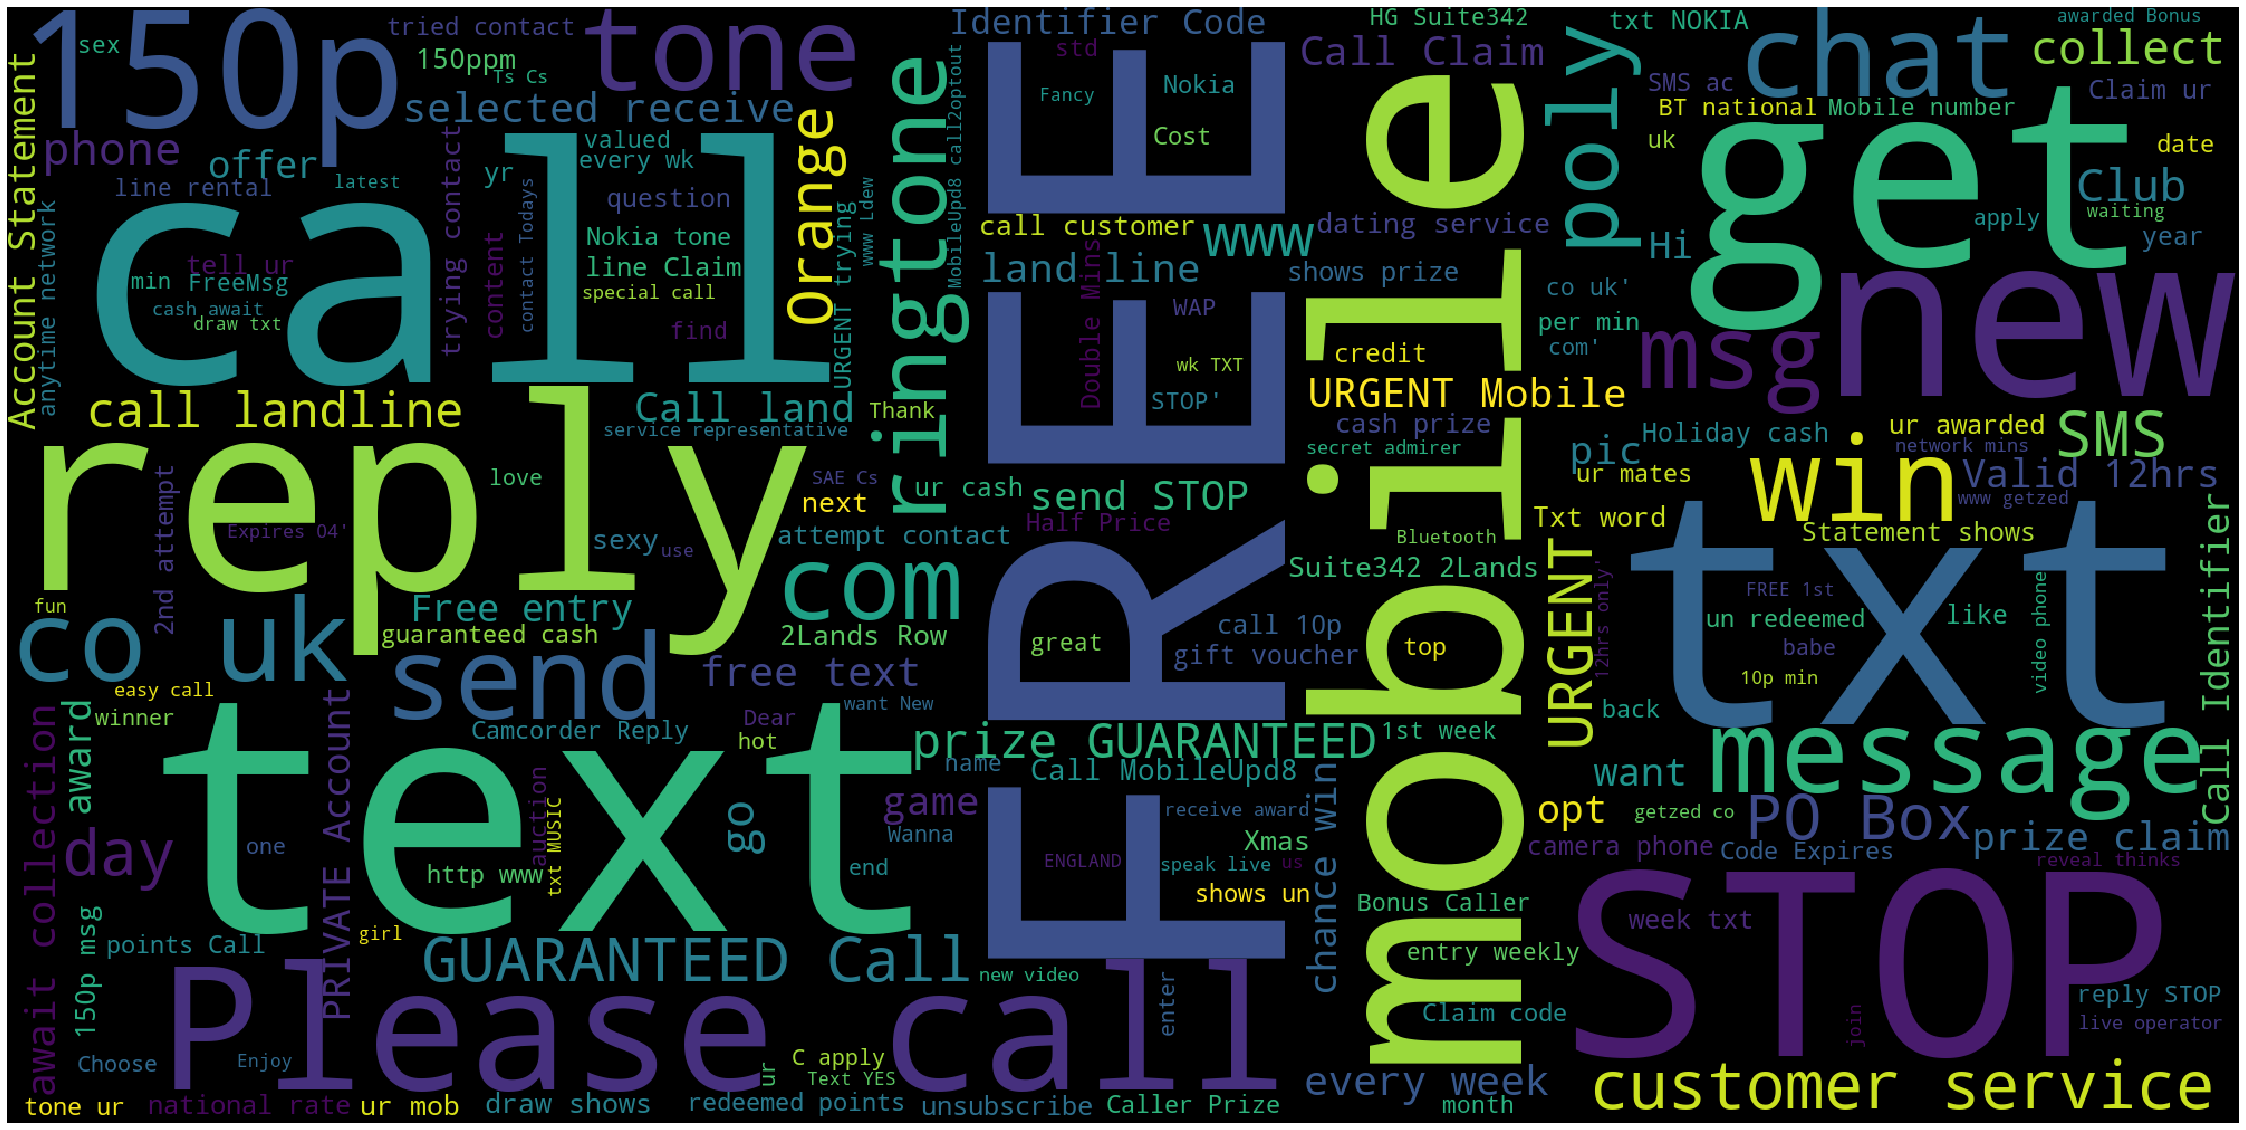

In [10]:
# plot spam
word_cloud = WordCloud(width=2000, 
                                            height=1000,
                                            background_color="black",
                                            stopwords=stop_words).generate(str(df[df["v1"]=="spam"]["v2"].values))

fig = plt.figure(figsize = (40, 30))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

ham sms contains [say, go, jurong, Available]

spam sms contains [txt, FREE, mobile, text, STOP]

# Data Preprocessing

**convert to lower**

**removing stop word**

**stemming word**

In [11]:
def convert_to_lower(text):
    text = text.lower()

    return text

In [12]:
def remove_punc(text):

    text = "".join([word for word in text if not word in punc])
    
    return text

In [13]:
def remove_stop_word(text):
    text = [word for word in text.split() if not word in stop_words]

    return text

In [14]:
def stemming_text(text):
    stemmer = stem.snowball.SnowballStemmer("english")
    text = " ".join([stemmer.stem(word) for word in text])

    return text

In [15]:
def normalize_text():
    df["convert_lower"] = df["v2"].apply(convert_to_lower)
    df["rm_punc"] = df["convert_lower"].apply(remove_punc)
    df["rm_stopword"] = df["rm_punc"].apply(remove_stop_word)
    df["clean"] = df["rm_stopword"].apply(stemming_text)
    
    return df

In [16]:
# punctuation
punc = string.punctuation

df = normalize_text()

In [17]:
df.head()

,v1,v2,convert_lower,rm_punc,rm_stopword,clean
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...",nah dont think goe usf live around though


next step is check percentage of punctuation in the text, The reason is punctuation might be affect to predict model.

In [18]:
def count_punc(text):
    
    punc_count = sum([1 for word in text if word in punc])
    
    return round(punc_count / (len(text) - text.count(" ")), 2) * 100

In [19]:
df["punc_percentage"] = df["v2"].apply(count_punc)

In [20]:
df.head()

,v1,v2,convert_lower,rm_punc,rm_stopword,clean,punc_percentage
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...,10.0
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkts 2...,5.0
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,15.0
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...",nah dont think goe usf live around though,4.0


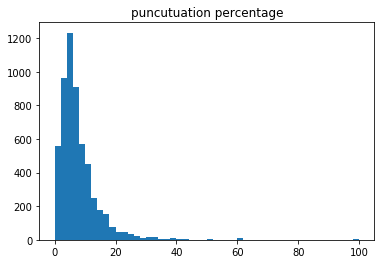

In [21]:
plt.hist(df["punc_percentage"], bins=50)
plt.title("puncutuation percentage")
plt.show()

Also check the length

In [22]:
df["length"] = df["v2"].apply(lambda x : len(x) - x.count(" "))

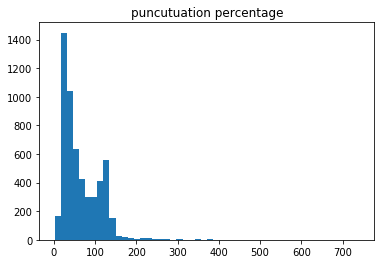

In [23]:
plt.hist(df["length"], bins=50)
plt.title("puncutuation percentage")
plt.show()

# Feature extraction

We need to convert text to TF-IDF feature

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df["clean"])
tfid_df = pd.DataFrame(vectors.toarray())

In [25]:
tfid_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8027,8028,8029,8030,8031,8032,8033,8034,8035,8036
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_final = pd.concat([df["punc_percentage"], df["length"], tfid_df], axis=1)
label = df["v1"]

In [27]:
df_final.head()

,punc_percentage,length,0,1,2,3,4,5,6,7,...,8027,8028,8029,8030,8031,8032,8033,8034,8035,8036
0,10.0,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final.values, label.values, test_size=0.3, random_state=42)

In [29]:
# categorical to numerical
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [30]:
# check
y_train, y_test

(array([1, 0, 0, ..., 0, 0, 0]), array([0, 0, 1, ..., 0, 0, 0]))

# Train model
I will use several different type of ml algorithms

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {
    "C": np.logspace(-3,3,7), 
    "penalty":["l1","l2"],
    "solver": ['liblinear']
}

clf = LogisticRegression(random_state=42)


clf = GridSearchCV(clf, param_grid=params, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   30.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [32]:
print("best parameter is {}".format(clf.best_params_))
print("accuracy is {}".format(clf.best_score_))

best parameter is {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy is 0.978974358974359


In [33]:
# use best param
best_clf = LogisticRegression(C=100.0, penalty="l2", solver="liblinear", random_state=42)
best_clf.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
pred = best_clf.predict(X_test)
probs = best_clf.predict_proba(X_test)[:, 1]

In [120]:
clf_accuracy = metrics.accuracy_score(y_test, pred)

# Model Evaluation

**check confusion matrics**

In [121]:
from sklearn import metrics
clf_metrics = metrics.confusion_matrix(y_test, pred)

In [122]:
clf_accuracy = metrics.accuracy_score(y_test, pred)

1446 and 188 are actual predictions, 7 and 31 are incorrect predictions

**visualize metrics as heatmap**

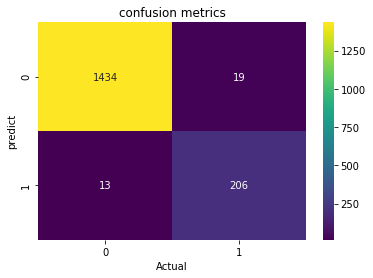

In [123]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, cmap="viridis", fmt="g")
plt.title("confusion metrics")
plt.xlabel("Actual")
plt.ylabel("predict")
plt.show()

In [124]:
print("Accuracy is {}".format(metrics.accuracy_score(y_test, pred)))
print("Precision is {}".format(metrics.precision_score(y_test, pred)))
print("Recall is {}".format(metrics.recall_score(y_test, pred)))

Accuracy is 0.9772727272727273
Precision is 0.9641025641025641
Recall is 0.8584474885844748


# ROC Curves and AUC 

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate AUC
clf_acu = roc_auc_score(y_test, probs)

# calculate roc
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [126]:
print('roc_auc_score for Logistic Regression: ', clf_acu)

roc_auc_score for Logistic Regression:  0.9888248844305751


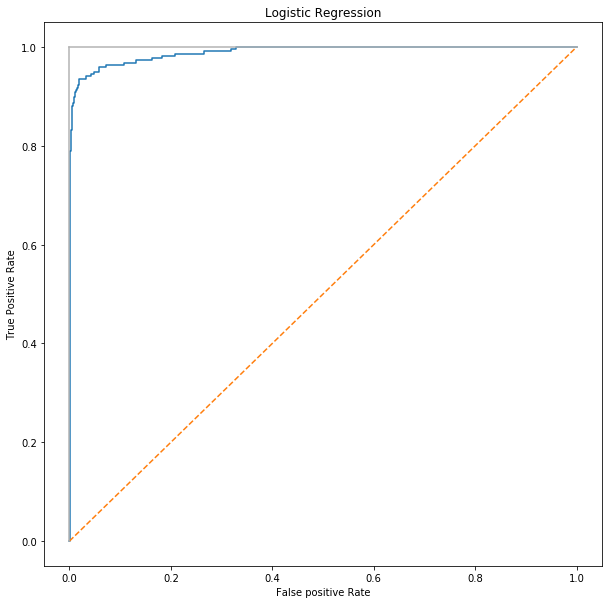

In [127]:
plt.subplots(figsize=(10, 10))
plt.title("Logistic Regression")
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False positive Rate")
plt.show()

This model seems working well

# XGBoost

In [43]:
from xgboost import XGBClassifier

params = {
    "min_child_weight": [1, 3],
    "gamma": [0.5, 1, 3],
    "learning_rate": [1, 0.1],
}

xgb = XGBClassifier()

xgb = GridSearchCV(estimator=xgb, param_grid=params, cv=5,verbose=1)
xgb.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 123.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.5, 1, 3], 'learning_rate': [1, 0.1],
                         'min_child_weight': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True,

In [44]:
print("best parameter is {}".format(xgb.best_params_))
print("accuracy is {}".format(xgb.best_score_))

best parameter is {'gamma': 0.5, 'learning_rate': 1, 'min_child_weight': 1}
accuracy is 0.9689743589743589


In [45]:
# use best param
best_xgb = XGBClassifier(gamma=0.5, learning_rate=1, min_child_weight=1)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [128]:
pred = best_xgb.predict(X_test)
probs = best_xgb.predict_proba(X_test)[:, 1]

In [129]:
xgb_accuracy = metrics.accuracy_score(y_test, pred)

# Model Evaluation

In [130]:
cnf_metrics = metrics.confusion_matrix(y_test, pred)

In [131]:
cnf_metrics

array([[1441,   12],
       [  25,  194]])

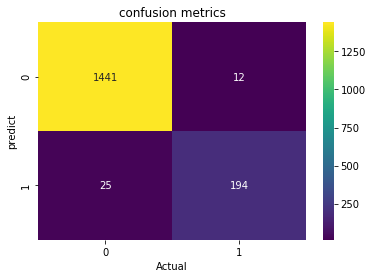

In [132]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, cmap="viridis", fmt="g")
plt.title("confusion metrics")
plt.xlabel("Actual")
plt.ylabel("predict")
plt.show()

In [133]:
print("Accuracy is {}".format(metrics.accuracy_score(y_test, pred)))
print("Precision is {}".format(metrics.precision_score(y_test, pred)))
print("Recall is {}".format(metrics.recall_score(y_test, pred)))

Accuracy is 0.9778708133971292
Precision is 0.941747572815534
Recall is 0.8858447488584474


# ROC Curves and AUC

In [134]:
# calculate AUC
xgb_acu = roc_auc_score(y_test, probs)

# calculate roc
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [135]:
print('roc_auc_score for XGBoost: ', xgb_acu)

roc_auc_score for XGBoost:  0.9758883368373417


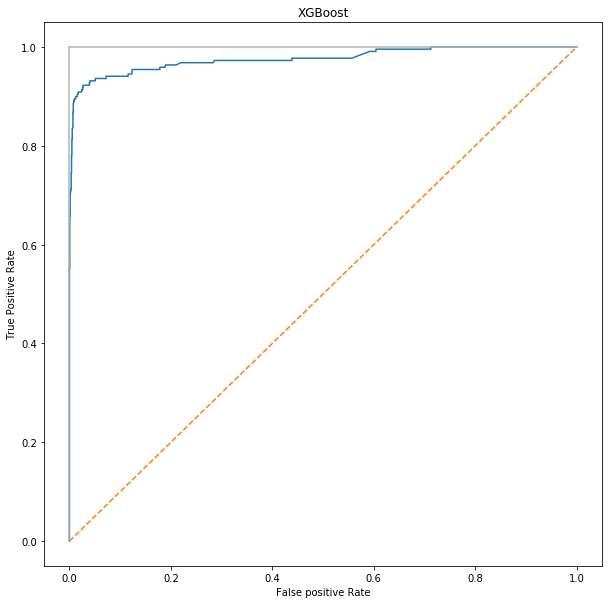

In [136]:
plt.subplots(figsize=(10, 10))
plt.title("XGBoost")
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False positive Rate")
plt.show()

# Neural network

In [74]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier

In [75]:
input_dim = X_train.shape[1]

def create_model(optimizer="SGD", dropout_rate=0.1):

    model = Sequential()
    model.add(Dense(64, activation=tf.nn.relu, input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=tf.nn.relu))
    model.add(Dense(1, activation=tf.nn.sigmoid))

    # compile model
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    return model

In [76]:
model = KerasClassifier(build_fn=create_model, verbose=0)

# parameter
param = {

    "batch_size": [32, 128],
    "epochs": [5, 10],
    "optimizer": ["Adam"],
    "dropout_rate": [0.2, 0.3]
    
}

model = GridSearchCV(estimator=model, param_grid=param, cv=5)

model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x1aee7e8c10>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [32, 128], 'dropout_rate': [0.2, 0.3],
                         'epochs': [5, 10], 'optimizer': ['Adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
print("best parameter is {}".format(model.best_params_))
print("accuracy is {}".format(model.best_score_))

best parameter is {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 10, 'optimizer': 'Adam'}
accuracy is 0.9807692289352417


In [137]:
pred = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

In [138]:
nn_accuracy = metrics.accuracy_score(y_test, pred)

In [139]:
cnf_metrics = metrics.confusion_matrix(y_test, pred)

In [140]:
cnf_metrics

array([[1434,   19],
       [  13,  206]])

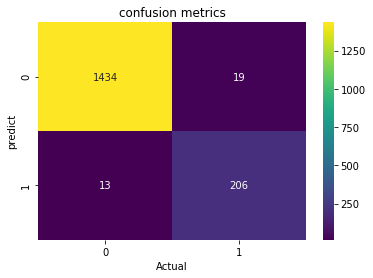

In [141]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_metrics), annot=True, cmap="viridis", fmt="g")
plt.title("confusion metrics")
plt.xlabel("Actual")
plt.ylabel("predict")
plt.show()

In [142]:
print("Accuracy is {}".format(metrics.accuracy_score(y_test, pred)))
print("Precision is {}".format(metrics.precision_score(y_test, pred)))
print("Recall is {}".format(metrics.recall_score(y_test, pred)))

Accuracy is 0.9808612440191388
Precision is 0.9155555555555556
Recall is 0.9406392694063926


In [143]:
# calculate AUC
nn_acu = roc_auc_score(y_test, probs)

# calculate roc
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [144]:
print('roc_auc_score for neural network: ', nn_acu)

roc_auc_score for neural network:  0.9925488754175741


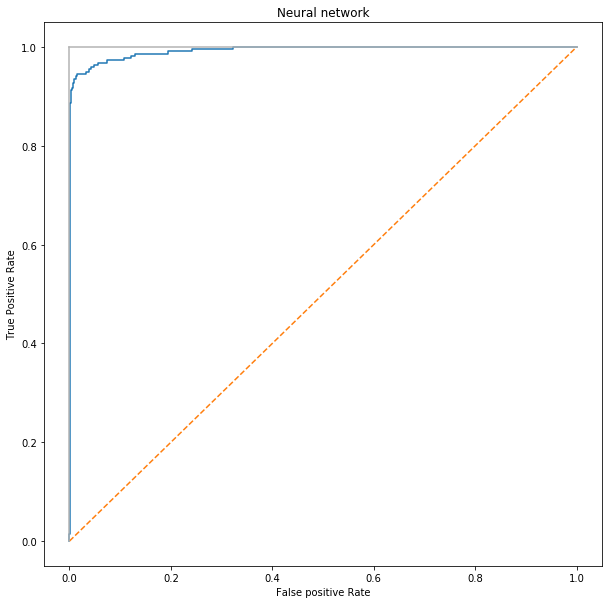

In [145]:
plt.subplots(figsize=(10, 10))
plt.title("Neural network")
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False positive Rate")
plt.show()

# Conclusion


In [147]:
result_df = pd.DataFrame({
    "Algorithms": [
                    "Logistic Regression", 
                    "XGBoost", 
                    "Neural Network",
    ],
    "Accuracy": [
                  clf_accuracy, 
                  xgb_accuracy, 
                  nn_accuracy,  
      ],
    "Auc score": [
                clf_acu,
                xgb_acu,
                nn_acu
    ]
})

result_df.sort_values("Accuracy", ascending=False)

,Algorithms,Accuracy,Auc score
2,Neural Network,0.980861,0.992549
1,XGBoost,0.977871,0.975888
0,Logistic Regression,0.977273,0.988825
